In [12]:
import pandas as pd
import numpy as np
import openpyxl

# user-defined modules
import _path

In [15]:
path  = _path.path
pathX = _path.pathX
pathY = _path.pathX

# 서울시 초등학교 정보

## 1. 서울시 초등학교 학년별 구성 정보 가져오기

In [3]:
# 서울특별시교육청(http://www.sen.go.kr/)
# 정보공개>서울교육통계>연도별 학교현황
# 게시글 제목: %학교 일람표
# - 서울시 학교별 기본 현황 자료(학급수, 학생수, 교원수) 제공
filename="20200401기준_학교일람표.xlsx"

In [4]:
wb = openpyxl.load_workbook(pathX+"\\"+filename)

In [5]:
# sheetname 확인
wb.sheetnames

['정오표',
 '유치원',
 '초등학교',
 '중학교',
 '고등학교',
 '특수학교',
 '각종학교',
 '고등기술학교',
 '방송통신중',
 '방송통신고']

In [6]:
df = pd.read_excel(pathX+"\\"+filename, sheet_name="초등학교")

In [7]:
# 컬럼명 재지정 위함
col_list = ["kk","소재구","학교명","설립","kk","kk","주소","kk" #전화번호까지
            ,"kk","kk","kk","kk","kk","kk","kk","kk","kk" # 학급수
            ,"1학년","kk","2학년","kk","3학년","kk","4학년","kk","5학년","kk","6학년","kk","kk","kk","kk","kk","kk","kk" #학생수
            ,"학급당평균학생수"
            ,"교원수","kk","kk","kk","kk","kk" #교원수
            ,"kk","kk","kk","kk","kk","kk" #직원수
            ,"교실수"]

In [8]:
df.columns = col_list

In [9]:
# 불필요한 row 삭제
df = df.drop(index=[0,1,2,3,611,612,613,614],axis=0) #axis=0 : row

In [10]:
# 필요한 컬럼만 남기기
df = df[["학교명","설립","소재구","1학년","2학년","3학년","4학년","5학년","6학년","학급당평균학생수","주소"]]

In [11]:
# 데이터 타입 변환(str->numeric)
df[["1학년","2학년","3학년","4학년","5학년","6학년","학급당평균학생수"]] = df[["1학년","2학년","3학년","4학년","5학년","6학년","학급당평균학생수"]].apply(pd.to_numeric)
# 한 컬럼씩 할 때는 np.astype(int) 동작함. 여러 컬럼을 한번에 할 때는 apply 사용

In [ ]:
df.설립.value_counts()

In [12]:
# 전학이 자유로운 공립학교만 남김
df = df[df.설립=='공립']

# 새로 지어진 학교는 제외
df = df[df['1학년']!=0]

In [13]:
# reset index
df.reset_index(drop=True, inplace=True)

In [ ]:
df.info()

In [14]:
df['전교생'] = df['1학년']+df['2학년']+df['3학년']+df['4학년']+df['5학년']+df['6학년']

In [15]:
df['1학년비율'] = round(df['1학년']/df['전교생']*100,3)
df['2학년비율'] = round(df['2학년']/df['전교생']*100,3)
df['3학년비율'] = round(df['3학년']/df['전교생']*100,3)
df['4학년비율'] = round(df['4학년']/df['전교생']*100,3)
df['5학년비율'] = round(df['5학년']/df['전교생']*100,3)
df['6학년비율'] = round(df['6학년']/df['전교생']*100,3)

In [16]:
# 4월1일 기준이니까. 학년초 전입전출 끝났다고 보고. 좋은 학군이어서 중학교 배정 잘 받으려고 전학 온 아이들 많은지 보는 건
# 1학년 6학년 학생수 비율로 비교해서 그 차이값 만큼 점수를 가져가자
# 16.667 보다 많은 비율 가지고 있는 학교에 한해서 점수를 주는 방법도 고민했었는데. 그냥 1,6학년 비율 비교하는게 심플하여 이처럼 결정.
df['6학년비율점수']= df['6학년비율'] - df['1학년비율']
#df['학생수비율점수1']= df['6학년비율'] - df['1학년비율']
#df['학생수비율점수2']= round((df['6학년'] - df['5학년']) / df['6학년']*100,3)

In [17]:
# 6학년비율점수: 소숫점 셋째자리까지
df['6학년비율점수'] = df['6학년비율점수'].round(3)

In [18]:
df

,학교명,설립,소재구,1학년,2학년,3학년,4학년,5학년,6학년,학급당평균학생수,주소,전교생,1학년비율,2학년비율,3학년비율,4학년비율,5학년비율,6학년비율,6학년비율점수
0,서울교동초등학교,공립,종로구,21,39,33,34,29,21,15.000000,서울특별시 종로구 삼일대로 446 (경운동),177,11.864,22.034,18.644,19.209,16.384,11.864,0.000
1,서울독립문초등학교,공립,종로구,82,82,86,73,93,75,19.076923,서울특별시 종로구 통일로12길 23 (무악동. 독립문초등학교),491,16.701,16.701,17.515,14.868,18.941,15.275,-1.426
2,서울매동초등학교,공립,종로구,26,42,27,46,22,46,14.466667,서울특별시 종로구 사직로9길 19 . 서울매동초등학교 (필운동),209,12.440,20.096,12.919,22.010,10.526,22.010,9.570
3,서울명신초등학교,공립,종로구,54,76,42,46,69,78,18.450000,서울특별시 종로구 낙산길 250 (창신동),365,14.795,20.822,11.507,12.603,18.904,21.370,6.575
4,서울세검정초등학교,공립,종로구,115,160,133,166,127,140,22.837838,서울특별시 종로구 세검정로9길 1 (신영동.서울세검정초등학교),841,13.674,19.025,15.815,19.738,15.101,16.647,2.973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,서울신암초등학교,공립,강동구,121,169,137,128,123,107,21.513514,서울특별시 강동구 올림픽로93길 33-16 . 서울신암초등학교 (암사동),785,15.414,21.529,17.452,16.306,15.669,13.631,-1.783
558,서울천동초등학교,공립,강동구,136,157,127,143,141,102,20.450000,서울특별시 강동구 성안로 200 . 서울천동초등학교 (길동),806,16.873,19.479,15.757,17.742,17.494,12.655,-4.218
559,서울천일초등학교,공립,강동구,41,57,54,60,40,72,17.368421,서울특별시 강동구 구천면로 266 . 서울천일초등학교 (천호동),324,12.654,17.593,16.667,18.519,12.346,22.222,9.568
560,서울천호초등학교,공립,강동구,115,116,125,116,115,102,18.342105,서울특별시 강동구 구천면로 310-11 (천호동.서울천호초등학교),689,16.691,16.836,18.142,16.836,16.691,14.804,-1.887


## 2. 서울시 초등학교 위/경도 얻기(GeoCoding ver.)

In [5]:
import googlemaps

import _googlemap_key as gk # gmap_key 기입하고 사용
gmaps = googlemaps.Client(key=gk.gmaps_key)

In [ ]:
for idx, row in df.iterrows():
    temp = gmaps.geocode(row.주소, language='ko')
    print(idx)
    
    if len(temp) == 0:  # 위/경도 return 못할 경우
        df.loc[idx,'위도'] = "NoData"
        df.loc[idx,'경도'] = "NoData"
        continue
    else:
        index = len(temp)-1
        df.loc[idx,'위도']=temp[index]['geometry']['location']['lat']
        df.loc[idx,'경도']=temp[index]['geometry']['location']['lng']


In [ ]:
df.info()

In [ ]:
SEOUL_ELSCH_INFO = df[['학교명','소재구','주소','위도','경도','1학년','6학년','전교생','1학년비율','6학년비율','6학년비율점수']]

In [ ]:
SEOUL_ELSCH_INFO.columns = ['SCH_NAME', 'GU', 'ADDR', 'LAT', 'LNG', 'GRADE1', 'GRADE6', 'TOT_NUM', 'GRADE1_PROP', 'GRADE6_PROP', 'SCORE_GRADE6_PROP']

## 3. 서울시 초등학교 학구도

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString, Point  # shapely(공간객체 담당) # fiona(좌표담당)

In [ ]:
SEOUL_ELSCH_INFO['GEOMETRY'] = SEOUL_ELSCH_INFO.apply(lambda row : Point([row['LNG'], row['LAT']]), axis=1)

In [ ]:
# dataframe -> geodataframe 변환
SEOUL_ELSCH_INFO = gpd.GeoDataFrame(SEOUL_ELSCH_INFO, geometry='GEOMETRY')

In [ ]:
print(SEOUL_ELSCH_INFO.crs)

In [ ]:
# 기본 위경도좌표는 EPSG4326
SEOUL_ELSCH_INFO.crs = {'init': 'epsg:4326'}

In [6]:
# 학구도 파일 import
filename = "초등학교학교군.shp"

In [ ]:
hakgudo_all = gpd.read_file(pathX+"\\"+filename)
hakgudo = hakgudo_all[hakgudo_all['EDU_UP_NM']=="서울특별시교육청"]
hakgudo.rename(columns = {'geometry':'HAKGUDO_GEO'}, inplace=True)

In [10]:
hakgudo.head(5)

,OBJECTID,HAKGUDO_ID,HAKGUDO_NM,HAKGUDO_GB,SD_CD,SGG_CD,EDU_UP_CD,EDU_UP_NM,EDU_CD,EDU_NM,CRE_DT,UPD_DT,BASE_DT,HAKGUDO_GEO
145,534013,Z000100526,서울미아초통학구역,0,11,290,7010000,서울특별시교육청,7121200,서울특별시성북강북교육지원청,2016-08-12,2020-12-09,2021-03-25,"POLYGON ((201912.834 555998.050, 201923.860 55..."
146,534014,Z000100034,서울청량초통학구역,0,11,230,7010000,서울특별시교육청,7021000,서울특별시동부교육지원청,2016-08-12,2020-12-10,2021-03-25,"POLYGON ((205342.235 555822.780, 205345.790 55..."
163,534033,Z000100187,서울선곡초통학구역,0,11,350,7010000,서울특별시교육청,7051000,서울특별시북부교육지원청,2016-08-12,2020-12-10,2021-03-25,"POLYGON ((205411.653 558394.285, 205417.513 55..."
260,533655,Z000100207,서울을지초통학구역,0,11,350,7010000,서울특별시교육청,7051000,서울특별시북부교육지원청,2016-08-12,2016-08-12,2021-03-25,"POLYGON ((206545.143 561234.395, 206552.023 56..."
291,535020,Z000100057,서울북한산초통학구역,0,11,380,7010000,서울특별시교육청,7031000,서울특별시서부교육지원청,2016-08-12,2016-08-12,2021-03-25,"POLYGON ((195739.485 561696.193, 195751.981 56..."


In [ ]:
print(hakgudo.crs, SEOUL_ELSCH_INFO.crs) # epsg:5186

In [ ]:
SEOUL_ELSCH_INFO = SEOUL_ELSCH_INFO.to_crs({'init':'epsg:5186'})

In [ ]:
print(SEOUL_ELSCH_INFO.SCH_NAME.count(), hakgudo.OBJECTID.count())

In [ ]:
# reset index
SEOUL_ELSCH_INFO.reset_index(drop=True, inplace=True)
hakgudo.reset_index(drop=True, inplace=True)

In [ ]:
SEOUL_ELSCH_INFO.assign(HAKGUDO_NM='')

In [ ]:
for idx_s, sch in SEOUL_ELSCH_INFO.iterrows():
    for idx_h, hgd in hakgudo.iterrows():
        if(sch.GEOMETRY.within(hgd.HAKGUDO_GEO) == True):           
            SEOUL_ELSCH_INFO.loc[idx_s,'HAKGUDO_NM'] = hgd.HAKGUDO_NM
            break
        else:
            continue

In [ ]:
# 확인용
SEOUL_ELSCH_INFO[pd.isna(SEOUL_ELSCH_INFO.HAKGUDO_NM)]

In [ ]:
for idx, sch in SEOUL_ELSCH_INFO.iterrows():
    if(pd.isna(sch.HAKGUDO_NM)):
        SEOUL_ELSCH_INFO.loc[idx,'HAKGUDO_NM'] = sch.SCH_NAME.split('등학교')[0]+"통학구역"
    else:
        continue

In [ ]:
school = pd.merge(SEOUL_ELSCH_INFO, hakgudo[['HAKGUDO_NM','HAKGUDO_GEO']], on='HAKGUDO_NM', how='left')

# 서울시 초등학교 정보(DB ver.)

In [ ]:
import pymssql

In [ ]:
conn = pymssql.connect(host="####", user="####", password="####", database="####", charset="utf8")

In [ ]:
SEOUL_ELSCH_INFO = pd.read_sql(sql= "select * from SEOUL_ELSCH_INFO", con=conn)

In [ ]:
conn.commit()

In [ ]:
# DB 연결 해제
conn.close()

# 서울시 초등학교 정보(엑셀파일 load ver.)

In [17]:
SEOUL_ELSCH_INFO = pd.read_excel(path+"\\"+"SEOUL_ELSCH_INFO.xlsx",sheet_name = 0, header=0)

In [18]:
SEOUL_ELSCH_INFO.head(2)

,SCH_NAME,GU,HAKGUDO_NM,ADDR,GRADE1,GRADE6,TOT_NUM,GRADE1_PROP,GRADE6_PROP,SCORE_GRADE6_PROP,LAT,LNG,GEOMETRY,HAKGUDO_GEO
0,서울가곡초등학교,강서구,서울가곡초통학구역,서울특별시 강서구 공항대로36길 74 (마곡동.가곡초등학교),108,144,816,13.235,17.647,4.412,37.555339,126.835817,POINT (185492.7699298028 550658.7554872994),"POLYGON ((186068.1481999997 550606.9287, 18604..."
1,서울가동초등학교,송파구,서울가동초통학구역,서울특별시 송파구 중대로20길 47 (가락동),129,150,900,14.333,16.667,2.334,37.497320,127.130219,POINT (211515.0870563909 544214.621542118),"POLYGON ((211901.8135000002 543558.6169000007,..."


In [19]:
SEOUL_ELSCH_INFO.describe()

,GRADE1,GRADE6,TOT_NUM,GRADE1_PROP,GRADE6_PROP,SCORE_GRADE6_PROP,LAT,LNG
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000
mean,107.012456,117.788256,683.138790,15.644931,17.300831,1.655900,37.550827,126.992484
std,60.310204,67.123663,368.384325,2.590528,2.742032,4.685213,0.055564,0.093067
min,10.000000,10.000000,87.000000,7.910000,9.429000,-15.545000,37.441271,126.804403
25%,62.000000,69.250000,413.000000,14.116500,15.627000,-0.806250,37.504632,126.912408
50%,96.500000,102.000000,612.000000,15.504000,17.319000,1.615500,37.546441,127.012714
75%,139.000000,150.000000,884.750000,17.078750,18.836250,4.477500,37.589577,127.068025
max,402.000000,467.000000,2212.000000,27.146000,27.233000,17.435000,37.686930,127.179758


In [31]:
SEOUL_ELSCH_INFO.SCORE_GRADE6_PROP.describe()

count    562.000000
mean       1.655900
std        4.685213
min      -15.545000
25%       -0.806250
50%        1.615500
75%        4.477500
max       17.435000
Name: SCORE_GRADE6_PROP, dtype: float64

In [38]:
plt.rc('font', family='malgun gothic')
plt.rcParams['axes.unicode_minus'] = False

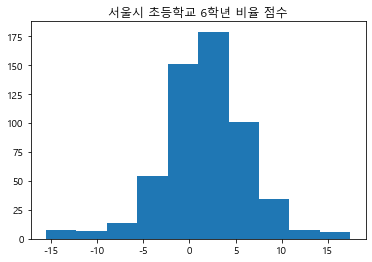

In [47]:
plt.hist(SEOUL_ELSCH_INFO.SCORE_GRADE6_PROP)
#plt.xlabel('X bins')
#plt.ylabel('Density')
plt.title('서울시 초등학교 6학년 비율 점수')
#plt.axis([1.5, 4.5, 0, 1.1])
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


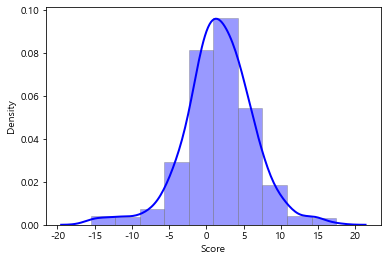

In [48]:
import seaborn as sns

ax = sns.distplot(SEOUL_ELSCH_INFO.SCORE_GRADE6_PROP, 
                      hist=True, 
                      kde=True, 
                      bins=10, 
                      color='blue', 
                      hist_kws={'edgecolor': 'gray'}, 
                      kde_kws={'linewidth': 2})
#ax.set_title('서울시 초등학교 6학년 비율 점수')
ax.set_xlabel('Score')
ax.set_ylabel('Density')
plt.show()

In [ ]:
# 오차 정규성 - QQ Plot

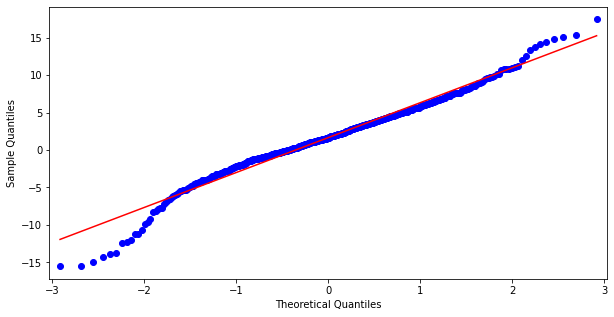

In [29]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

rand = np.random.uniform(low=0, high=2, size=1000)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
sm.qqplot(SEOUL_ELSCH_INFO.SCORE_GRADE6_PROP, line='r', ax=ax)
plt.show()

# fig.add_subplot(111) == fig.add_subplot(1,1,1)
# 111 : 1x1그리드에 첫 번째 subplot
# 234 : 2x3그리드에 네 번째 subplot
# nml : nxm그리그에 l번째 subplot